# Parte 1 Infraestrutura

In [1]:
# python version
!python --version

Python 3.10.13


In [2]:
# virtualenv
!which python

/Users/bakudas/code/pos-infnet-clusterizacao/pos-pd-clusterizacao/bin/python


In [3]:
# install libs
!pip install scikit-learn scikit-learn-extra pandas matplotlib seaborn scipy numpy &> /dev/null

In [4]:
# generate requirements file
!pip freeze > requirements.txt

In [5]:
# check requirements file
!cat requirements.txt

appnope==0.1.4
asttokens==2.4.1
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.8
decorator==5.1.1
exceptiongroup==1.2.2
executing==2.1.0
fonttools==4.55.0
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.3
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
scikit-learn==1.5.2
scikit-learn-extra==0.3.0
scipy==1.14.1
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
wcwidth==0.2.13


## Jupyter notebook rodando
![jupyter rodando](./images/jupyter_env.png)

# Parte 2 Escolha de base de dadosos.

## Objetivo da Análise Exploratória de Dados (EDA)

### Propósitos

- Compreender a estrutura e características dos dados;
- Identificar padrões, tendências e anomalias;
- Preparar os dados para modelagem de clusterização.

#### Importação das Bibliotecas

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

## 2.1 Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país.

In [7]:
# importa e lê a base de dados
df = pd.read_csv("data/Country-data.csv")

In [8]:
# Análise inicial para conhecer os atributos e volume dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# Renomear os atributos para facilitar a análise
atributos = ["pais", "mortalidade_infantil", "exportacoes", 
           "saude", "importacoes", "renda_per_capita", 
           "inflacao", "expectativa_vida", "fertilidade_total", 
           "pib_per_capita"]

# Aplica os novos nomes para os atributos da relação
df.columns = atributos

In [10]:
# Estatísticas básicas da base de dados
df.describe()

,mortalidade_infantil,exportacoes,saude,importacoes,renda_per_capita,inflacao,expectativa_vida,fertilidade_total,pib_per_capita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# Contagem de valores faltantes
df.isnull().sum()

pais                    0
mortalidade_infantil    0
exportacoes             0
saude                   0
importacoes             0
renda_per_capita        0
inflacao                0
expectativa_vida        0
fertilidade_total       0
pib_per_capita          0
dtype: int64

#### Análise de Outliers

## 2.2. Quantos Países existem no dataset?

In [266]:
num_paises = df['pais'].nunique()
print(f"Número de países: {num_paises}")

Número de países: 167


## 2.3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

<Axes: >

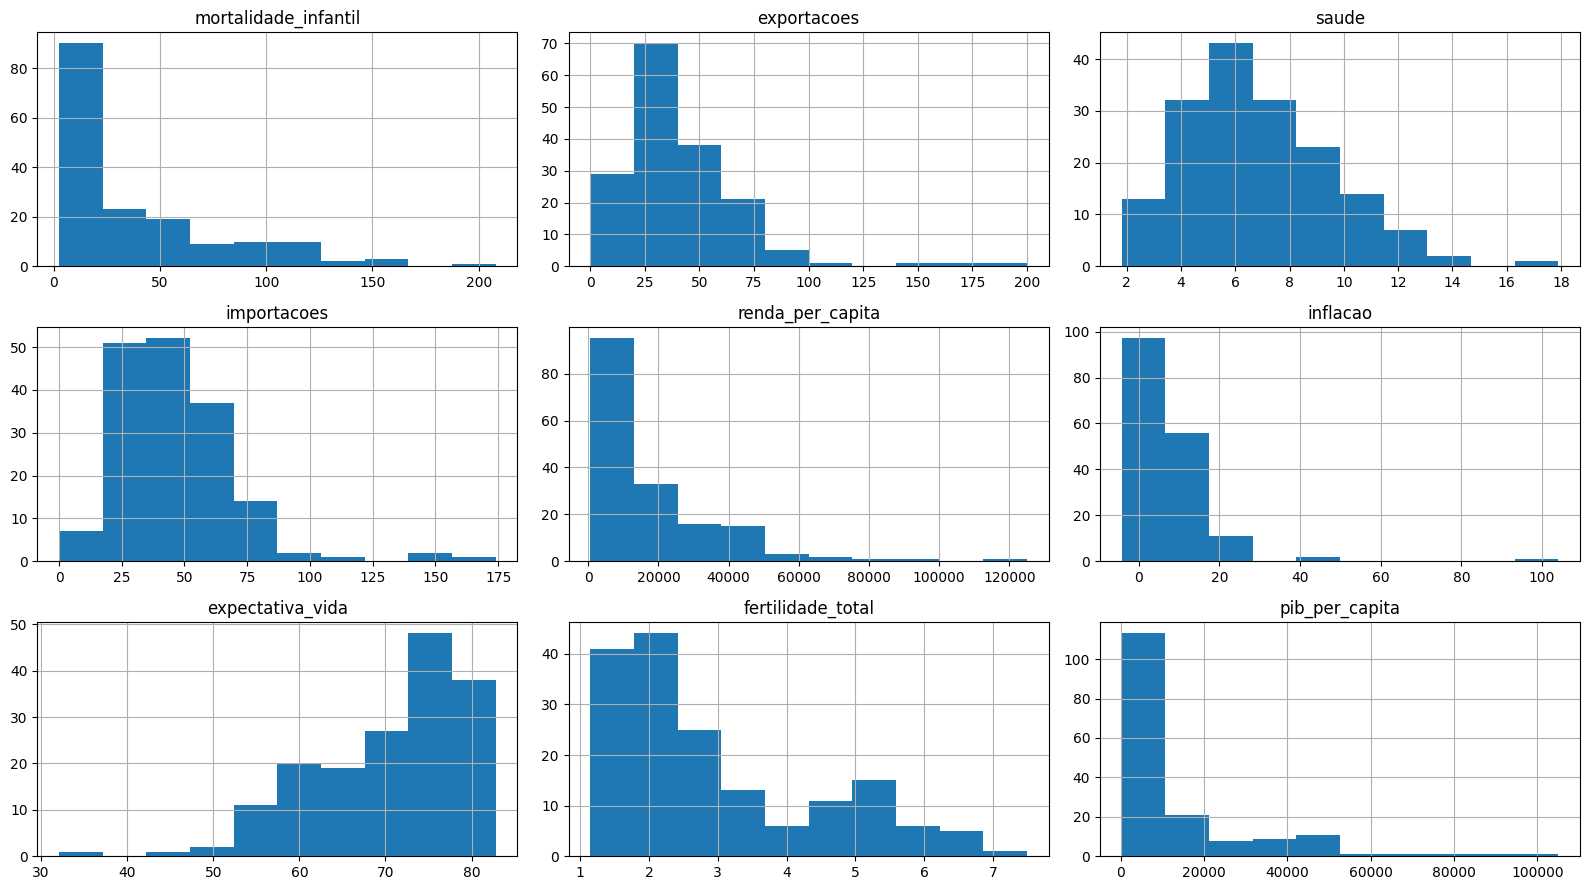

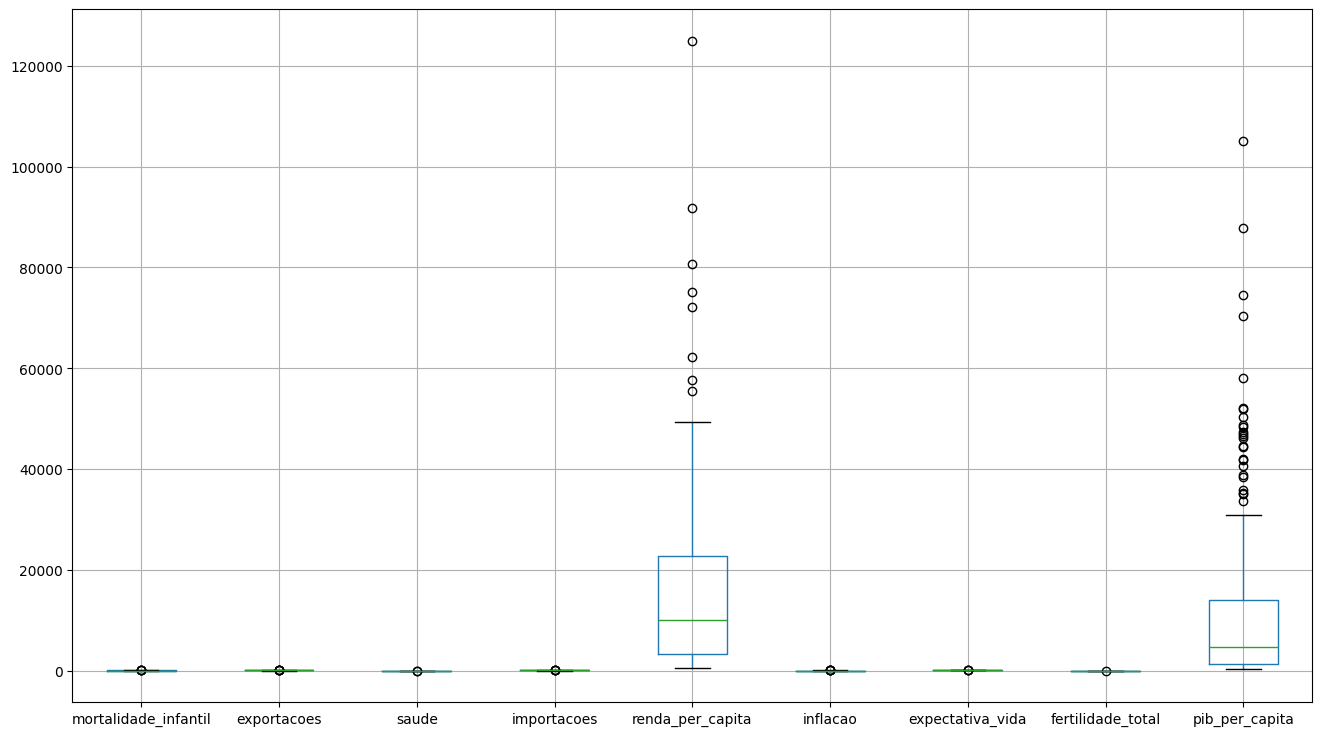

In [12]:
# Histogramas
df.hist(figsize=(16,9))
plt.tight_layout()

# Boxplots para identificar outliers
plt.figure(figsize=(16,9))
df.boxplot()

In [265]:
# Observar um sample da instância
df.head()

,pais,mortalidade_infantil,exportacoes,saude,importacoes,renda_per_capita,inflacao,expectativa_vida,fertilidade_total,pib_per_capita,cluster_kmeans,cluster_hierarchical,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,3,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,3,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,3,0


In [264]:
# Segmenta a relação apenas com dados numéricos
df_numerical = df.drop(columns=['pais'])

#### Análise de Correlação

Baseado na análise de correlações é possível perceber que alguns atributos da relação podem ser cruzados para fornecer insights prévios de possíveis agrupamentos.

#### Correlações encontradas:
- Correlação entre gastos em saúde e expectativa de vida
- Impacto da renda per capita na expectativa de vida
- Correlação entre importações e exportações

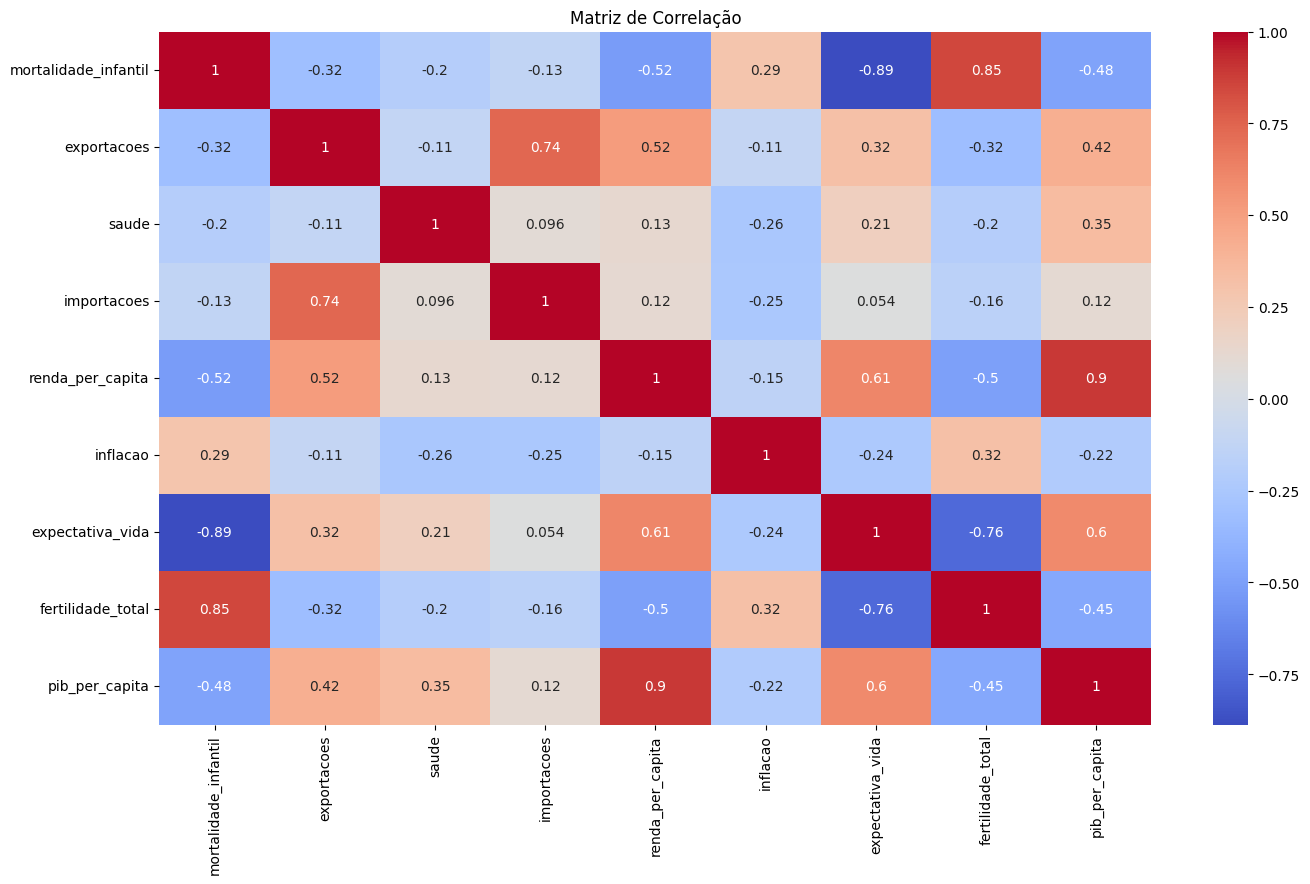

In [262]:
# Matriz de correlação
corr_matrix = df_numerical.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#### Normalização dos dados

Houve um mapeamento de outliers e será necessário realizar uma normalização nos dados utilizando MinMaxScaler para que a diferença nas escalas das variáveis não conduzam para resultados enviesados contribuindo de forma equilibrada para a análise.

Em seguida vamos realizar também uma redução de dimensionalidade para seguir com a clusterização.

In [230]:
from sklearn.preprocessing import MinMaxScaler

# Normalização (escala 0-1)
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# Parte 3 Clusterização

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

- K-Médias
- Clusterização Hierárquica

Para os resultados, do K-Médias:
- Interprete cada um dos clusters obtidos citando:
  - Qual a distribuição das dimensões em cada grupo
  - O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

### Redução de dimensionalidade

#### Utilização da técnica PCA

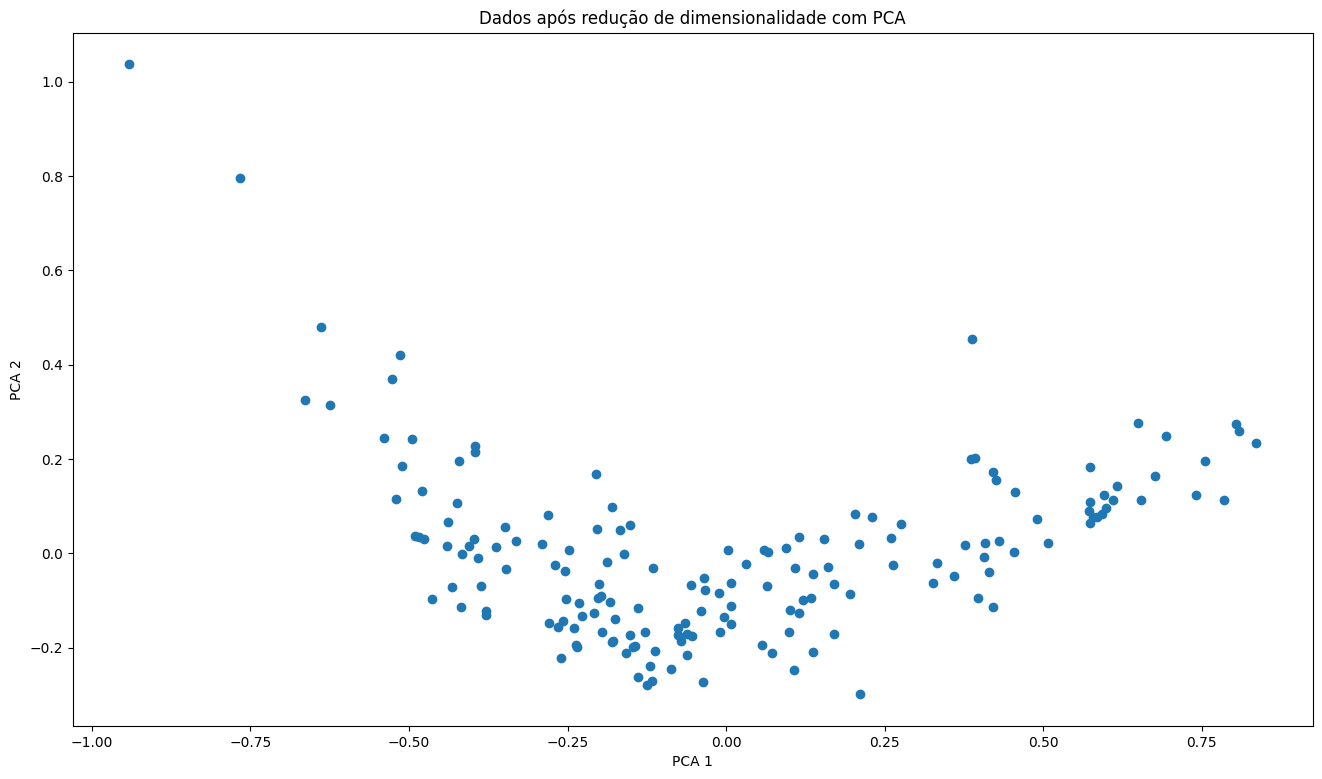

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

plt.figure(figsize=(16, 9))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Dados após redução de dimensionalidade com PCA')
plt.show()

## K-Means utilizando 3 Clusters

In [234]:
# Clusterizando com K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit_predict(df_pca)
df['cluster_kmeans'] = kmeans.labels_

In [235]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_pca)
representative_countries = df.iloc[closest][["pais", "cluster_kmeans"]]
print("Países mais representativos de cada cluster:")
representative_countries

Países mais representativos de cada cluster:


,pais,cluster_kmeans
144,Sweden,0
56,Gambia,1
9,Azerbaijan,2


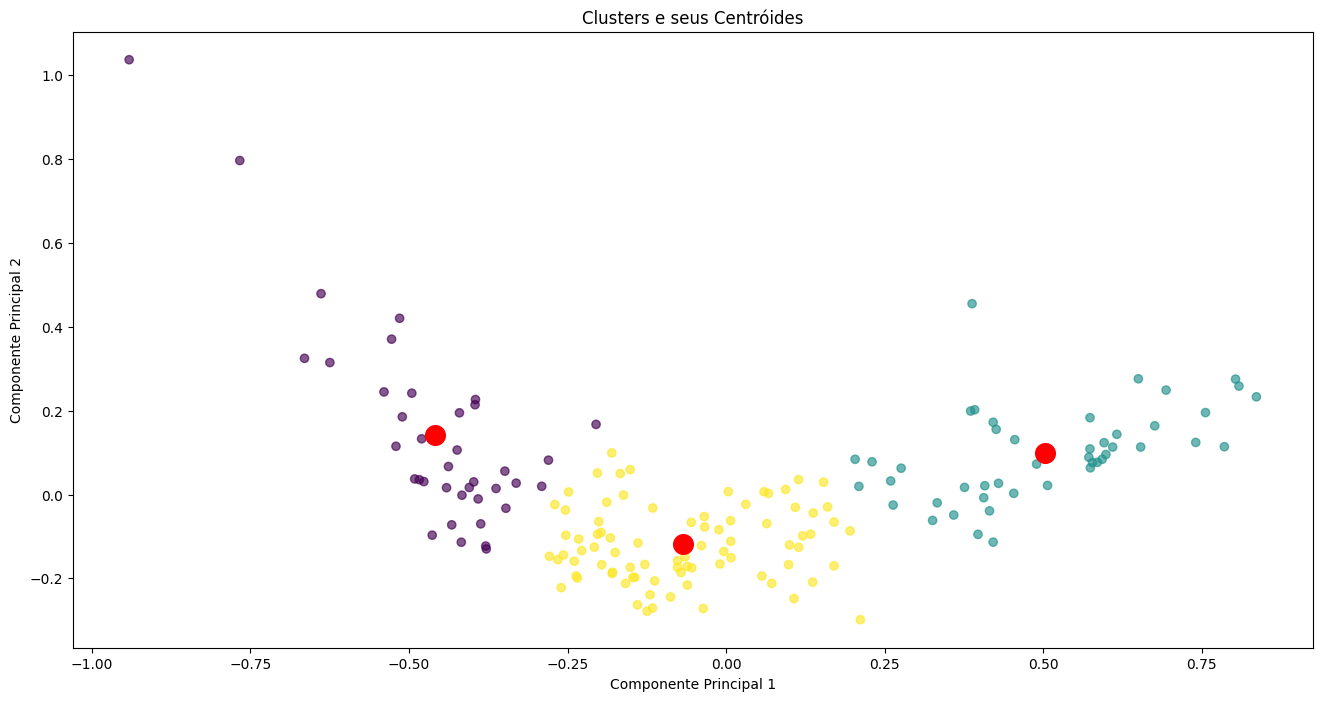

In [242]:
# labels e centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotando os clusters e os centróides
plt.figure(figsize=(16, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.65)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='o')  # Plotando os centróides
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters e seus Centróides')
plt.show()


## K-Means com 5 clusters

In [243]:
# Clusterizando com K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit_predict(df_pca)
df['cluster_kmeans'] = kmeans.labels_

In [244]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_pca)
representative_countries = df.iloc[closest][["pais", "cluster_kmeans"]]
print("Países mais representativos de cada cluster:")
representative_countries

Países mais representativos de cada cluster:


,pais,cluster_kmeans
57,Georgia,0
63,Guinea,1
137,South Africa,2
123,Qatar,3
135,Slovenia,4


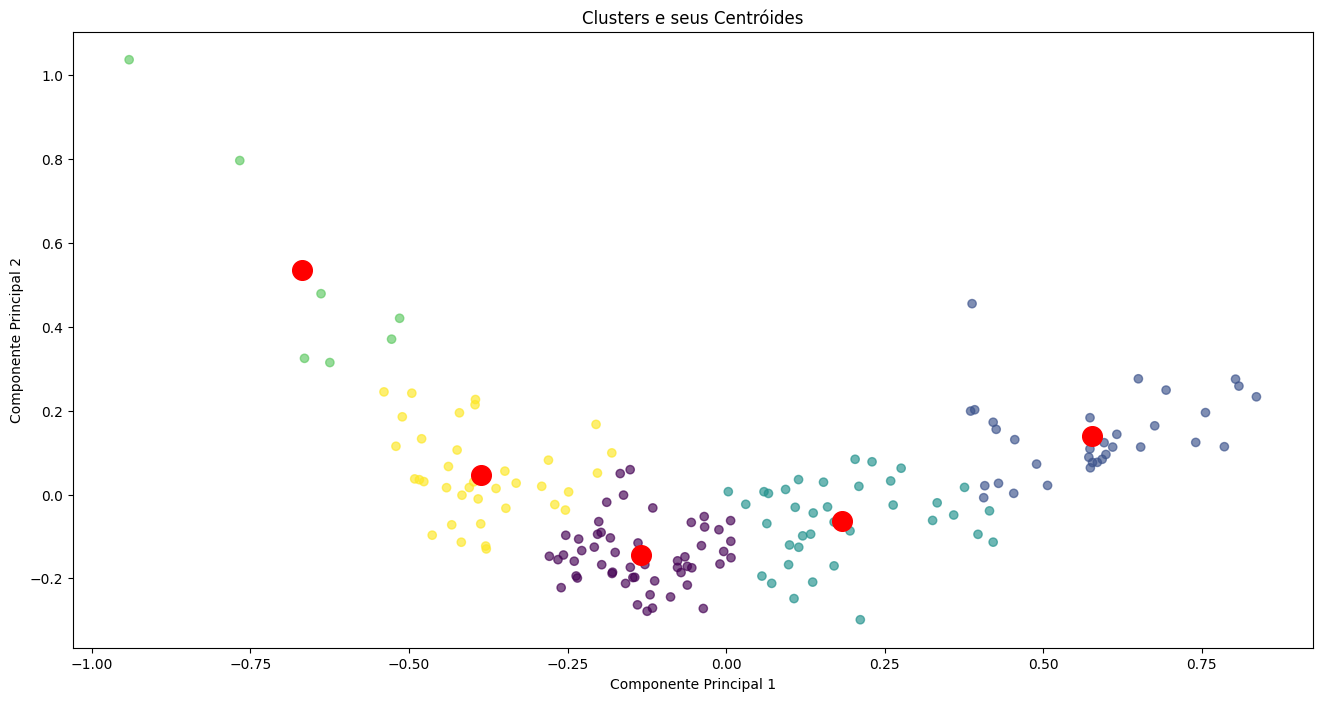

In [245]:
# labels e centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotando os clusters e os centróides
plt.figure(figsize=(16, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.65)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='o')  # Plotando os centróides
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters e seus Centróides')
plt.show()


## Clusterização Hierarquica

In [283]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

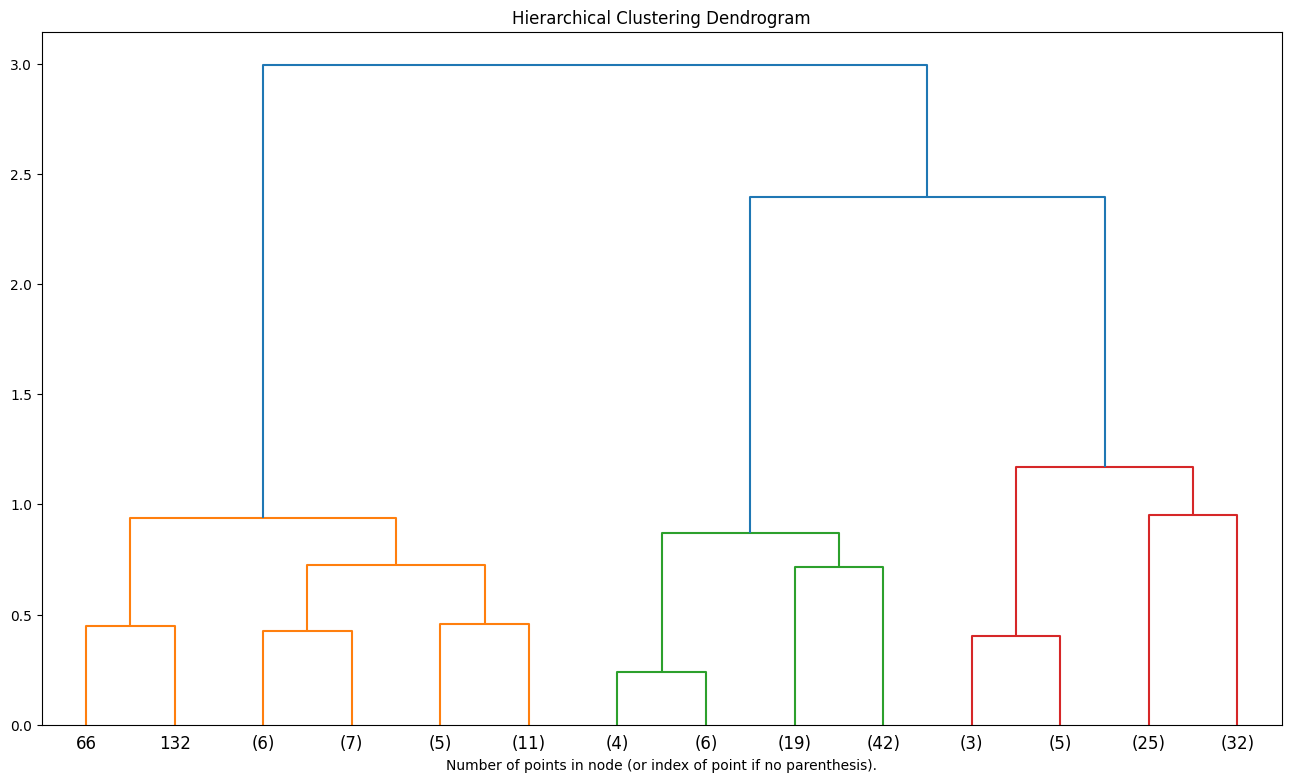

In [285]:
# Clusterização Hierárquica utilizando AgglomerativaClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

# Plot Dendrogram
plt.figure(figsize=(16, 9))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

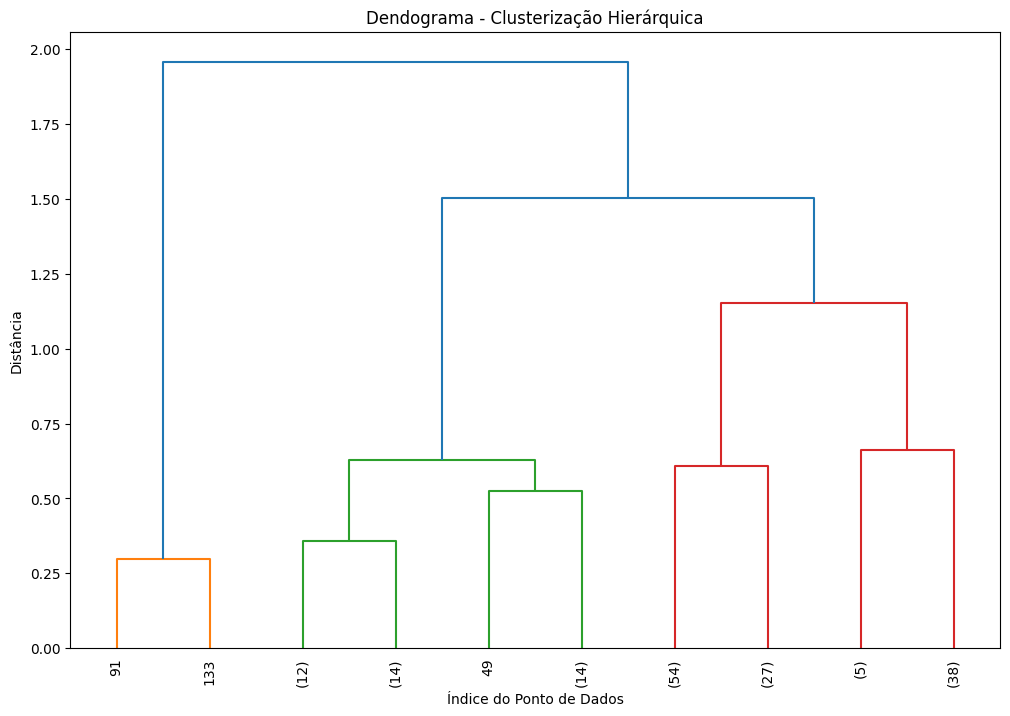

In [290]:
# Gerar a Matriz de Ligação
Z = linkage(df_pca, method='complete')

# Plotar o Dendograma para Análise Visual
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendograma - Clusterização Hierárquica')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Distância')
plt.show()

# Aplicando a clusterização hierarquica com 5 clusters
clusters_hierarchical = fcluster(Z, 5, criterion='maxclust')

# Cria atributo na relação com os dados da clusterização hierarquica
df['cluster_hierarchical'] = clusters_hierarchical

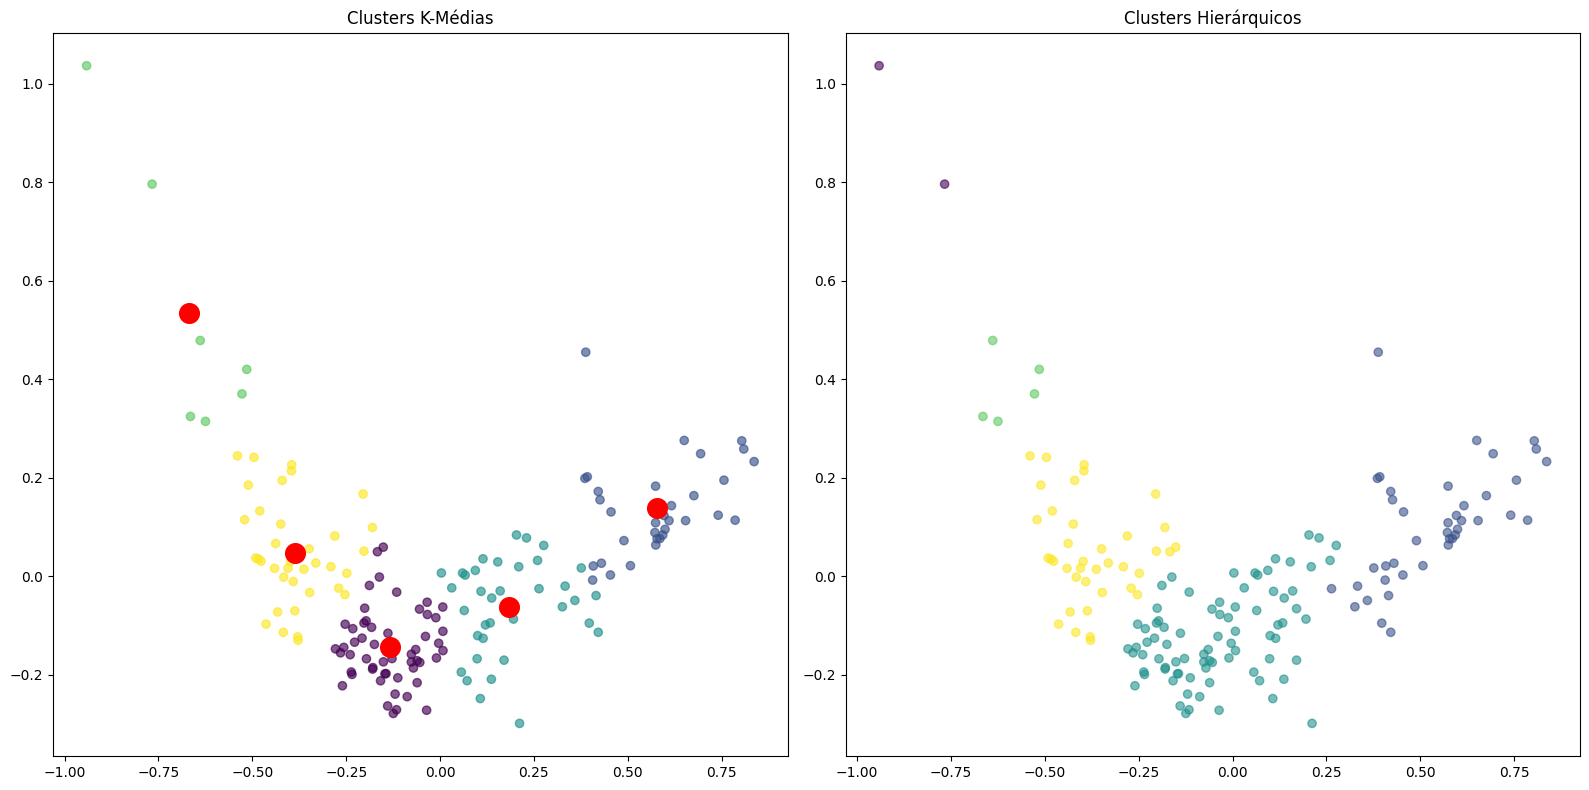

In [292]:
plt.figure(figsize=(16, 8))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.65)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='o')  # Plotando os centróides
plt.title('Clusters K-Médias')

# Clusterização Hierárquica
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster_hierarchical'], cmap='viridis', alpha=0.6)
plt.title('Clusters Hierárquicos')

plt.tight_layout()
plt.show()


In [256]:
# Agrupamento de países pelo atributo cluster_kmeans
df_grouped = df.groupby('cluster_kmeans')['pais'].apply(list)

# Exibir o agrupamento de países por cluster k-means
for cluster, countries in df_grouped.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print()

Cluster 0:
 - Albania
 - Algeria
 - Antigua and Barbuda
 - Argentina
 - Armenia
 - Azerbaijan
 - Barbados
 - Belarus
 - Belize
 - Bhutan
 - Bosnia and Herzegovina
 - Brazil
 - Bulgaria
 - Cape Verde
 - Chile
 - China
 - Colombia
 - Costa Rica
 - Croatia
 - Dominican Republic
 - Ecuador
 - El Salvador
 - Georgia
 - Grenada
 - Iran
 - Jamaica
 - Kazakhstan
 - Latvia
 - Lebanon
 - Libya
 - Macedonia, FYR
 - Maldives
 - Mauritius
 - Moldova
 - Montenegro
 - Morocco
 - Panama
 - Paraguay
 - Peru
 - Poland
 - Romania
 - Russia
 - Saudi Arabia
 - Serbia
 - Sri Lanka
 - St. Vincent and the Grenadines
 - Suriname
 - Thailand
 - Tunisia
 - Turkey
 - Ukraine
 - Uruguay
 - Venezuela
 - Vietnam

Cluster 1:
 - Afghanistan
 - Angola
 - Benin
 - Burkina Faso
 - Burundi
 - Cameroon
 - Central African Republic
 - Chad
 - Comoros
 - Congo, Dem. Rep.
 - Congo, Rep.
 - Cote d'Ivoire
 - Equatorial Guinea
 - Gambia
 - Guinea
 - Guinea-Bissau
 - Haiti
 - Lesotho
 - Liberia
 - Madagascar
 - Malawi
 - Mali
 - M

In [258]:
# Agrupamento de países pelo atributo cluster_hierarchical
df_grouped = df.groupby('cluster_hierarchical')['pais'].apply(list)

# Exibir o agrupamento de países por cluster hierarquico
for cluster, countries in df_grouped.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print()

Cluster 1:
 - Afghanistan
 - Angola
 - Benin
 - Burkina Faso
 - Burundi
 - Cameroon
 - Central African Republic
 - Chad
 - Congo, Dem. Rep.
 - Congo, Rep.
 - Cote d'Ivoire
 - Equatorial Guinea
 - Gambia
 - Guinea
 - Guinea-Bissau
 - Haiti
 - Lesotho
 - Liberia
 - Malawi
 - Mali
 - Mauritania
 - Mozambique
 - Niger
 - Nigeria
 - Sierra Leone
 - Tanzania
 - Togo
 - Uganda
 - Zambia

Cluster 2:
 - Bolivia
 - Botswana
 - Cambodia
 - Comoros
 - Eritrea
 - Fiji
 - Gabon
 - Ghana
 - Guatemala
 - Guyana
 - Iraq
 - Jordan
 - Kenya
 - Kiribati
 - Kyrgyz Republic
 - Lao
 - Madagascar
 - Micronesia, Fed. Sts.
 - Mongolia
 - Namibia
 - Pakistan
 - Philippines
 - Rwanda
 - Samoa
 - Senegal
 - Solomon Islands
 - South Africa
 - Sudan
 - Tajikistan
 - Timor-Leste
 - Tonga
 - Turkmenistan
 - Vanuatu
 - Yemen

Cluster 3:
 - Albania
 - Algeria
 - Antigua and Barbuda
 - Argentina
 - Armenia
 - Azerbaijan
 - Bahamas
 - Bahrain
 - Bangladesh
 - Barbados
 - Belarus
 - Belize
 - Bhutan
 - Bosnia and Herzegovi

# Análise pessoal

Na minha análise, o K-MEANS se mostrou melhor e mais versátil que o Cluster Hierárquico. Mas com o auxílio do dendrogram a forma hierárquica ganha bastante força com a possibilidade de uma análise visual do corte dos clusters.

Achei ideal a quantidade de 5 (CINCO) clusters para representar os agrupamentos de países com caracteriscticas similares. Com 3 (TRÊS) clusters ainda percebia uma grande distância entre os países que figuravam os grupos.

Porém resolvi fazer análises e clusterização com base na análise de correlações e segmentando-a a definição dos clusters por pares de correlações fortes. Segue:

                      pais  saude  expectativa_vida
159          United States  17.90              78.7
101  Micronesia, Fed. Sts.  14.20              65.4
132           Sierra Leone  13.10              55.0
110            Netherlands  11.90              80.7
54                  France  11.90              81.4
..                     ...    ...               ...
154           Turkmenistan   2.50              67.9
38             Congo, Rep.   2.46              60.4
116               Pakistan   2.20              65.3
107                Myanmar   1.97              66.8
123                  Qatar   1.81              79.5

[167 rows x 3 columns]


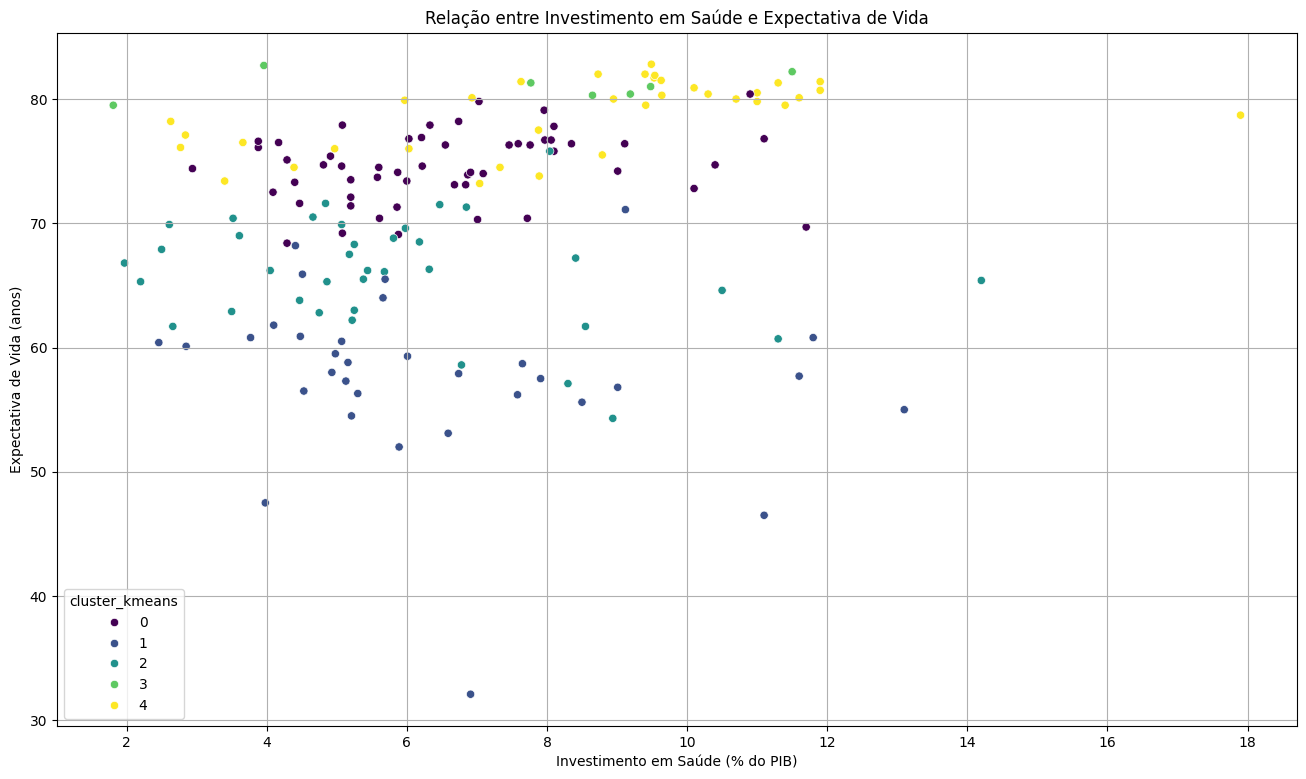

In [157]:
print(df[["pais", "saude", "expectativa_vida"]].sort_values("saude", ascending=False))

# Scatter plot entre investimento em saúde e expectativa de vida
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='saude', y='expectativa_vida', hue='cluster_kmeans', palette='viridis')
plt.title('Relação entre Investimento em Saúde e Expectativa de Vida')
plt.xlabel('Investimento em Saúde (% do PIB)')
plt.ylabel('Expectativa de Vida (anos)')
plt.grid(True)
plt.show()

        saude  mortalidade_infantil
159  4.047436             -0.770246
101  2.696381              0.043025
132  2.294716              3.027505
110  1.856536             -0.839884
54   1.856536             -0.847345
..        ...                   ...
154 -1.575873              0.590179
38  -1.590479              0.637434
116 -1.685418              1.338787
107 -1.769403              0.649869
123 -1.827827             -0.727966

[167 rows x 2 columns]


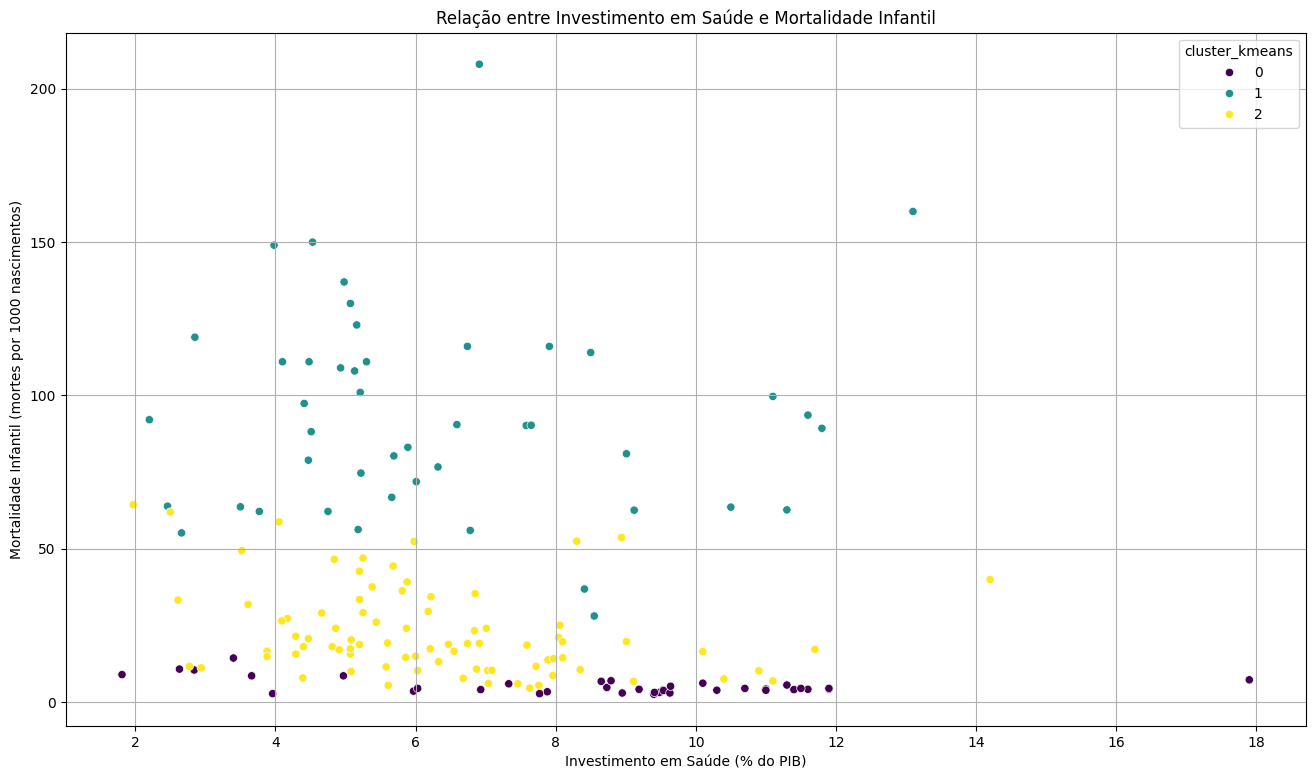

In [148]:
print(df_scaled[["saude", "mortalidade_infantil"]].sort_values("saude", ascending=False))

# Scatter plot entre investimento em saúde e mortalidade infantil
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='saude', y='mortalidade_infantil', hue='cluster_kmeans', palette='viridis')
plt.title('Relação entre Investimento em Saúde e Mortalidade Infantil')
plt.xlabel('Investimento em Saúde (% do PIB)')
plt.ylabel('Mortalidade Infantil (mortes por 1000 nascimentos)')
plt.grid(True)
plt.show()

                      pais  saude  expectativa_vida
159          United States  17.90              78.7
101  Micronesia, Fed. Sts.  14.20              65.4
132           Sierra Leone  13.10              55.0
110            Netherlands  11.90              80.7
54                  France  11.90              81.4
..                     ...    ...               ...
154           Turkmenistan   2.50              67.9
38             Congo, Rep.   2.46              60.4
116               Pakistan   2.20              65.3
107                Myanmar   1.97              66.8
123                  Qatar   1.81              79.5

[167 rows x 3 columns]


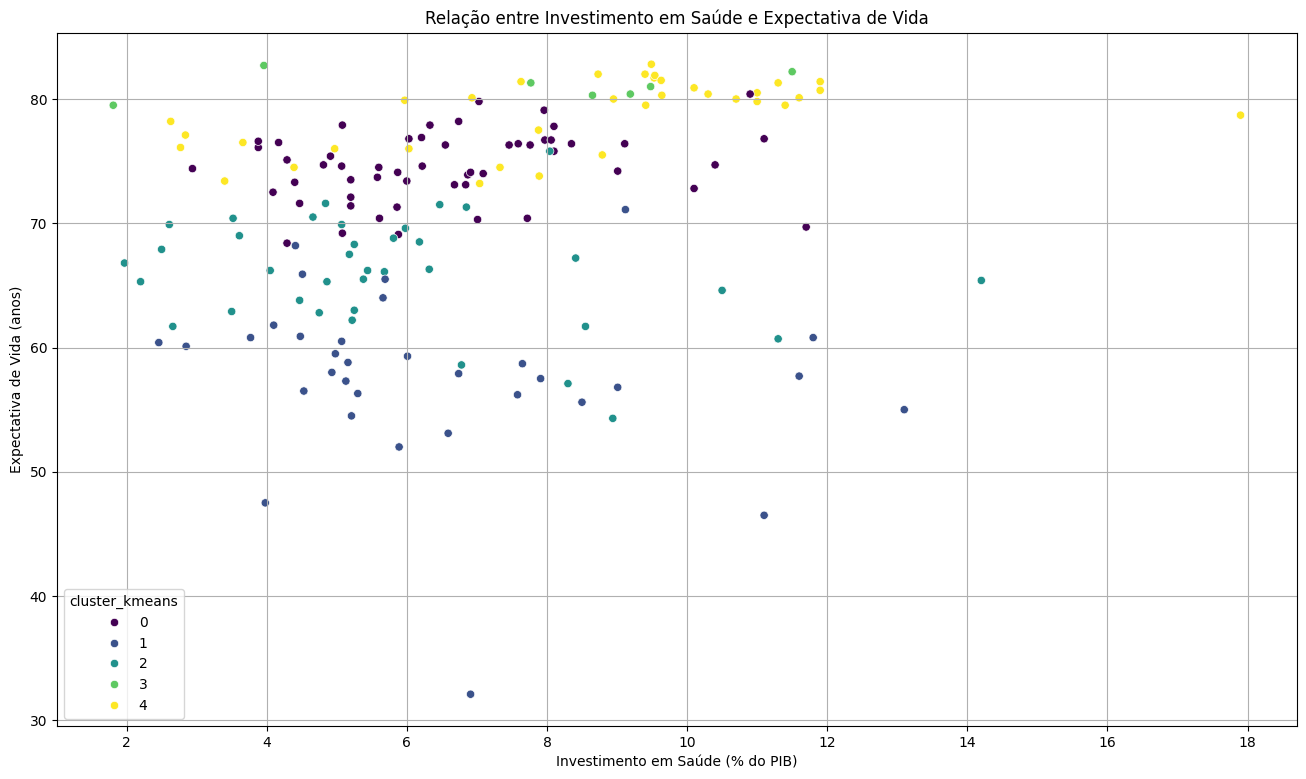

In [293]:
print(df[["pais", "saude", "expectativa_vida"]].sort_values("saude", ascending=False))

# Scatter plot entre investimento em saúde e expectativa de vida
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='saude', y='expectativa_vida', hue='cluster_kmeans', palette='viridis')
plt.title('Relação entre Investimento em Saúde e Expectativa de Vida')
plt.xlabel('Investimento em Saúde (% do PIB)')
plt.ylabel('Expectativa de Vida (anos)')
plt.grid(True)
plt.show()

In [294]:
# Clusterizando com K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit_predict(df_normalized[["saude", "expectativa_vida"]])
df['cluster_kmeans_corr1'] = kmeans.labels_

In [295]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_normalized[["saude", "expectativa_vida"]])
representative_countries = df.iloc[closest][["pais", "cluster_kmeans"]]
print("Países mais representativos de cada cluster:")
representative_countries

Países mais representativos de cada cluster:


,pais,cluster_kmeans
67,Hungary,4
15,Belgium,4
113,Nigeria,1
155,Uganda,1
6,Armenia,0


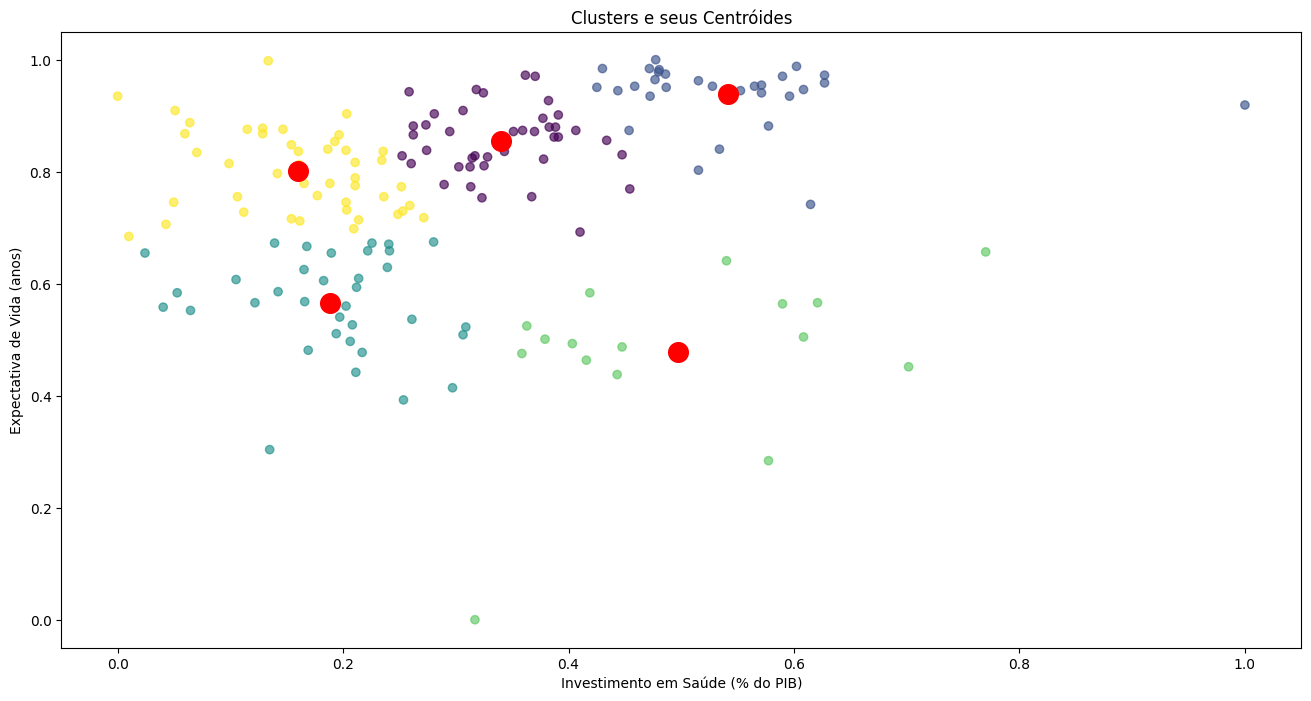

In [297]:
# labels e centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotando os clusters e os centróides
plt.figure(figsize=(16, 8))
plt.scatter(df_normalized["saude"], df_normalized["expectativa_vida"], c=labels, cmap='viridis', alpha=0.65)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='o')  # Plotando os centróides
plt.xlabel('Investimento em Saúde (% do PIB)')
plt.ylabel('Expectativa de Vida (anos)')
plt.title('Clusters e seus Centróides')
plt.show()


In [298]:
# Agrupamento de países pelo atributo cluster_kmeans
df_grouped = df.groupby('cluster_kmeans_corr1')['pais'].apply(list)

# Exibir o agrupamento de países por cluster k-means
for cluster, countries in df_grouped.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print()

Cluster 0:
 - Albania
 - Antigua and Barbuda
 - Argentina
 - Bahamas
 - Barbados
 - Brazil
 - Bulgaria
 - Chile
 - Colombia
 - Croatia
 - Cyprus
 - Czech Republic
 - Dominican Republic
 - Ecuador
 - El Salvador
 - Estonia
 - Guatemala
 - Hungary
 - Iraq
 - Israel
 - Jordan
 - Latvia
 - Lebanon
 - Lithuania
 - Luxembourg
 - Macedonia, FYR
 - Maldives
 - Mauritius
 - Panama
 - Paraguay
 - Poland
 - Samoa
 - Slovak Republic
 - South Korea
 - Suriname
 - Timor-Leste
 - Tunisia
 - Turkey
 - Ukraine
 - Uruguay
 - Vietnam

Cluster 1:
 - Australia
 - Austria
 - Belgium
 - Bosnia and Herzegovina
 - Canada
 - Costa Rica
 - Denmark
 - Finland
 - France
 - Georgia
 - Germany
 - Greece
 - Iceland
 - Ireland
 - Italy
 - Japan
 - Malta
 - Moldova
 - Montenegro
 - Netherlands
 - New Zealand
 - Norway
 - Portugal
 - Serbia
 - Slovenia
 - Spain
 - Sweden
 - Switzerland
 - United Kingdom
 - United States

Cluster 2:
 - Angola
 - Benin
 - Burkina Faso
 - Cambodia
 - Cameroon
 - Central African Republic
 -

# Parte 4 Escolha de algoritmos

## 4.1 Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.


O K-Médias é um algoritmo de aprendizado não supervisionado para particionar um conjunto de dados em clusters separados.

1. Inicialização dos Centróides

- Escolhe aleatoriamente pontos do conjunto de dados como centróides iniciais.

2. Atribuição dos Clusters

- Para cada ponto do conjunto de dados, utilizando uma métrica de distância, atribua-o ao centróide mais próximo.
- A métrica de distância geralmente utilizada é a distância euclidiana.

3. Recalcular os Centróides

- Após todos os pontos serem atribuídos aos clusters, calcule o novo centróide, utilizando média-aritmética, de cada cluster.

4. Iteração até Convergência

- Repetir as etapas de atribuição e recalculação dos centróides até que os centróides não mudem mais de forma significativa entre as repetições (ou até atingir um número máximo de iterações).

## 4.2 O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.


Etapas do Algoritmo K-Medóides:

1. Inicialização dos Medóides:

- Escolher aleatoriamente pontos da instância de dados como os medóides iniciais.

2. Atribuição aos Medóides:

- Para cada ponto do conjunto de dados, atribua-o ao medóide mais próximo.

3. Atualizar os Medóides:

- Em cada cluster, vamos substituir o medóide atual por um ponto do cluster que minimize a soma das distâncias entre ele e todos os outros pontos do cluster.

4. Convergência:

- Continue o processo de atribuir pontos aos medóides e atualizar os medóides até que os medóides não mudem mais entre as repetições.

## 4.3 O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Primeiramento porque ele usa a média dos pontos para definir os centróides dos clusters. 

E a média é muito afetada por valores com distorções extremas, o que significa que um outlier pode deslocar significativamente o centróide de um cluster.



## 4.4 Por que o algoritmo de DBScan é mais robusto à presença de outliers?


Porque ele identifica automaticamente os outliers e realiza uma clusterização baseada na densidade dos pontos. Expandindo regiões densamente conectada com uma lógica central a partir do raio de vizinhança dos pontos e da quantidade de pontos necessários para forma uma região. Desconsidera os outliers e rotula como ruído desta maneira não afetam os clusters formados.